# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [1]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 

import csv           # to read the dataset

import sys           # to handle the overflow error due to large size of dataset
maxInt = sys.maxsize 



while True:                          

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
         maxInt = int(maxInt/10)  # end of the handling of overflow error, source = stackoverflow

vocab={}                   # global variable to store the vocabulary

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
  words=[]     
  for word in email.split():
      if(word not in words):    # we are also removing the duplicates if any
        words.append(word)       
  return words

  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
  ps= PorterStemmer()
  stem_words = []
  for w in words:
    if ps.stem(w) not in stem_words:
      stem_words.append( ps.stem(w))
 
  return stem_words



# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stemmed):
  stem_no_stop_words =[]
  for word in stemmed:
     if word not in stopwords.words('english'):
       stem_no_stop_words.append(word)
  return stem_no_stop_words


# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(stemmed_no_stop):
  for word in stemmed_no_stop:
    if word not in vocab:
      vocab[word]=len(vocab)+1
  return vocab




# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_word,vocab):
  email_bow = []
  for word in vocab:
    email_bow.append(stem_word.count(word))
  
  return email_bow


email_bow_list=[]             # it will store the list of bow of all the emails of dataset
sws_list=[]                   # it contains the list of all words after stemmig and removing stop words
labels=[]                    # At first i am keeping 2 lists, 1(labels) to store the label and other(data) for the data/emails


# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()

def read_data():
  
  filename = open('spam_or_not_spam.csv', 'r')
  file = csv.DictReader(filename)
  emails=[]
  for col in file:
    emails.append(col['email'])
    labels.append(col['label'])

  for email in emails:          # i will go through every email and call store its stemmed words in a list   
    words=[]                    
    stemmed=[]
    stemming_without_stop=[]
    email_bow=[]
    words = read_email(email)
    stemmed = stemming(words)
    stemming_without_stop = remove_stop_words(stemmed)
    sws_list.append(stemming_without_stop)
    vocab= build_vocabulary(stemming_without_stop)      # then will enhance my vocabulary using it


  for stem in sws_list:
    email_bow=get_bow(stem,vocab)    # here we call text to bow function
    email_bow_list.append(email_bow) # and then append it to the list

  return emails
data= read_data()



  



# read_data()

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

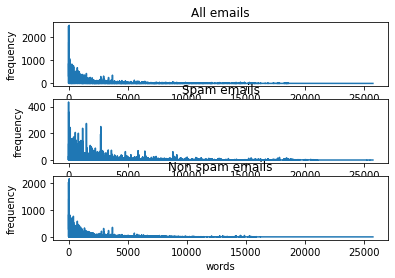

In [2]:
import matplotlib.pyplot as plt

# visuallze data distribution
def data_vis(email_bow_list,label):
                               
  total_email_bow=[0]*len(email_bow_list[0])                # first we will plot frequency of word-occurence in all the emails
  for emails_bow in email_bow_list:
    for i in range(len(email_bow_list[0])):
      total_email_bow[i]=total_email_bow[i]+ emails_bow[i]
  x= list(range(1,len(email_bow_list[0])+1))
  plt.subplot(3,1,1)
  plt.plot(x,total_email_bow)
  plt.xlabel('words')
  plt.ylabel('frequency')
  
  plt.title('All emails')
  

  

  spam=0
  not_spam=0
  # print(labels)
  for i in range(len(labels)):
    if labels[i]==1:
      spam+=1
    else:
      not_spam+=1
  spam_email_bow=[0]*len(email_bow_list[0])     # now we will move forward to plot for spam emails and non spam emails
  non_spam_email_bow=[0]*len(email_bow_list[0])

  for i in range(len(email_bow_list)):
    if(labels[i]=='1'):
      for j in range(len(email_bow_list[0])):
        spam_email_bow[j]=spam_email_bow[j]+email_bow_list[i][j]
    else:
      for j in range(len(email_bow_list[0])):
        non_spam_email_bow[j]=non_spam_email_bow[j]+email_bow_list[i][j]
  plt.subplot(3,1,2)
  plt.plot(x,spam_email_bow)
  plt.xlabel('words')
  plt.ylabel('frequency')
  plt.title('Spam emails')
  

  plt.subplot(3,1,3)
  plt.plot(x,non_spam_email_bow)
  plt.xlabel('words')
  plt.ylabel('frequency')
  plt.title('Non spam emails')
  

  


# print(len(email_bow_list))
data_vis(email_bow_list,labels)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
import random

emailbow_with_label=list(zip(email_bow_list,labels))  # now i am attaching the labels with the data which was not the case earlier
# split dataset
def split(data):
  X=[]
  y=[]
  
  random.shuffle(data)         # we will use random to split our dataset 
  for email in data:
    X.append(email[0])            # X will contain the bow of email
    y.append(email[1])            # y will store the label
  training_size= int(len(data)*0.8)  # for splittig in 80:20

  X_train = X[:training_size]
  X_test= X[training_size:]
  y_train = y[:training_size]
  y_test= y[training_size:]

  return X_train, X_test, y_train,y_test

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset

def svm_classifier(X_train,X_test,y_train):

  
  classifier = SVC(kernel = 'linear' , random_state = 0) # we will use kernel to be linear classification
  classifier.fit(X_train, y_train)                       # now we will fit the data
  train_predictions = classifier.predict(X_train)        
  test_predictions=classifier.predict(X_test)            # here we will predict the test set
  return train_predictions,test_predictions
  
# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset

def knn_classifier(X_train,y_train,X_test):
 
  classifier = KNeighborsClassifier(n_neighbors=55)     # we will do similarly for knn one
  classifier.fit(X_train,y_train)
  train_predictions = classifier.predict(X_train)
  test_predictions=classifier.predict(X_test)
  return train_predictions,test_predictions
  # return predict_labels

train_data, test_data, train_y,test_y = split(emailbow_with_label)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data,train_y)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data,train_y ,test_data)

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  true__labels = [float(true_label) for true_label in true_labels]
  predicted__labels = [float(predicted_label) for predicted_label in predicted_labels]
  acc= accuracy_score(true__labels,predicted__labels)  # to calculatethe accuracy
  return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
  true__labels = [float(true_label) for true_label in true_labels]
  predicted__labels = [float(predicted_label) for predicted_label in predicted_labels]
  auc= roc_auc_score(true__labels,predicted__labels)  # to calculate the auc
  return auc

svm_accuracy = compute_accuracy(test_y, svm_test_predictions)
knn_Accuracy = compute_accuracy(test_y, knn_test_predictions)

svm_Auc = compute_auc(test_y,svm_test_predictions)
knn_Auc = compute_auc(test_y,knn_test_predictions)
print("SVM Accuracy = "+ str(svm_accuracy))
print("KNN Accuracy = "+ str(knn_Accuracy))
print("SVM AUC = "+ str(svm_Auc))
print("KNN AUC = "+ str(knn_Auc))
# write code to print train and test accuracy and AUC score of SVM and k-NN classifier

SVM Accuracy = 0.9683333333333334
KNN Accuracy = 0.855
SVM AUC = 0.9572709775987618
KNN AUC = 0.5693069306930694
